## Global params

In [1]:
img_directory = '/home/ec2-user/img_align_celeba'
img_save_directory = '/home/ec2-user/autoencoder-vaegan/zach'
model_weights_path = '/home/ec2-user/model-weights.hdf5'
batch_size = 32
training_set_size = 256
img_size = 64

## Imports and helper functions

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import os
from utils import load_img, resize_crop
%matplotlib inline

def imshow(imgs):
    fig = plt.figure()
    nimgs = len(imgs)
    for i in range(nimgs):
        a=fig.add_subplot(1,nimgs,i+1)
        plt.imshow(imgs[i])
        plt.axis('off')

## Load training data

In [3]:
training = np.array([resize_crop(load_img(i+1, img_directory), (img_size, img_size)) for i in range(training_set_size)])

/home/ec2-user/.conda/envs/keras/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


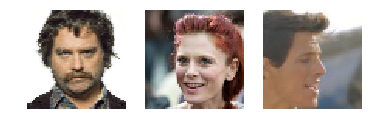

In [ ]:
imshow([training[i] for i in range(3)])

## Create model and load weights

In [ ]:
from model import Vaegan
model = Vaegan(img_shape=(img_size, img_size, 3), batch_size=batch_size)

Using TensorFlow backend.


In [ ]:
if (False):
    model.model.load_weights(model_weights_path)

## Zach and latest output of Zach

In [ ]:
onlyfiles = [f for f in os.listdir(img_save_directory) if os.path.isfile(os.path.join(img_save_directory, f))]
if (len(onlyfiles) > 0):
    latest = max(onlyfiles)
    imshow([training[0], sp.ndimage.imread(os.path.join(img_save_directory, latest))])

## Train

Reset image save filename counter

In [ ]:
save_idx = 0

In [ ]:
start = save_idx
stop = save_idx + 1

for i in range(start, stop):
    model.model.fit(x=training, y=training, epochs=10, batch_size=batch_size, verbose=True)
    predictions = model.model.predict(training[:batch_size], batch_size=batch_size)
    path = os.path.join(img_save_directory, '%04d.jpg' % i)
    sp.misc.imsave(path, predictions[0])
    save_idx = i
    
# model.model.save_weights(save_model)

In [ ]:
predictions = model.model.predict(training[:batch_size], batch_size=batch_size)
predictions.shape
predictions[0]